In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('lego_sets.csv')
data.head(3)

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US


In [3]:
#---Deleting unnecessary features from dataset---#
main_df = data.drop(['prod_desc','prod_id','prod_long_desc'],axis=1)
main_df.head(3)

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.99,11.0,74.0,4.3,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US


In [4]:
#to find out feature wise %of missing/null values 
main_df.isnull().mean()*100

ages                  0.000000
list_price            0.000000
num_reviews          13.212625
piece_count           0.000000
play_star_rating     14.476796
review_difficulty    16.760460
set_name              0.000000
star_rating          13.212625
theme_name            0.024468
val_star_rating      14.639915
country               0.000000
dtype: float64

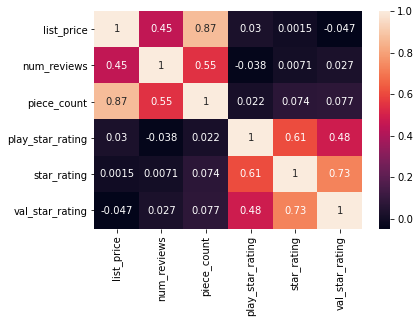

In [5]:
#---Correlation mapping---#
sns.heatmap(main_df.corr(),annot=True)

In [6]:
#---Deleting null values and storing the dataset in new dataframe---#
new_df = main_df.dropna()

#---Deleting ages feature---#
new_df.drop('ages',inplace=True,axis=1)

In [7]:
new_df.head(3)

,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,29.99,2.0,277.0,4.0,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,19.99,2.0,168.0,4.0,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,12.99,11.0,74.0,4.3,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US


In [8]:
#---Transforming categorical features using Label encoder---#
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in new_df.select_dtypes('object'):
    new_df[col] = le.fit_transform(new_df[col])

In [9]:
new_df.head()

,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,29.99,2.0,277.0,4.0,0,81,4.5,0,4.0,20
1,19.99,2.0,168.0,4.0,2,404,5.0,0,4.0,20
2,12.99,11.0,74.0,4.3,2,403,4.3,0,4.1,20
3,99.99,23.0,1032.0,3.6,0,601,4.6,1,4.3,20
4,79.99,14.0,744.0,3.2,1,484,4.6,1,4.1,20


In [10]:
#---Feature selection---#

#---Using Forward selection of Wrapper's method---# 

X = new_df.drop('list_price',axis=1)
Y = new_df['list_price']

columns = []
for col in X:
    columns.append(col)
    X_new = new_df[columns]
    x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.25, random_state=1)
    lin = LinearRegression()
    lin.fit(x_train, y_train)
    score = lin.score(x_test, y_test)
    print("Columns : {:<20}| Score : {}".format(col, score))

Columns : num_reviews         | Score : 0.19197312685125312
Columns : piece_count         | Score : 0.7737289886055857
Columns : play_star_rating    | Score : 0.7738314091553745
Columns : review_difficulty   | Score : 0.7745712178075783
Columns : set_name            | Score : 0.7756185552515275
Columns : star_rating         | Score : 0.781256783182591
Columns : theme_name          | Score : 0.7818756098927729
Columns : val_star_rating     | Score : 0.7900858132135049
Columns : country             | Score : 0.7900441536594783


In [11]:
#Significant change in score can be noticed at num_reviews and piece_count

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

#---Using Lasso regression for feature selection---#
ls = Lasso(alpha=70,random_state=1)

ls.fit(x_train,y_train)

#---Getting feature wise respective coefficient---#
for col,coef in zip(X.columns, ls.coef_):
    print("Columns : {:<20}| Score : {}".format(col, coef))

Columns : num_reviews         | Score : -0.002641694814076436
Columns : piece_count         | Score : 0.09821104579098282
Columns : play_star_rating    | Score : 0.0
Columns : review_difficulty   | Score : -0.0
Columns : set_name            | Score : -0.017844600628711554
Columns : star_rating         | Score : -0.0
Columns : theme_name          | Score : 0.0
Columns : val_star_rating     | Score : -0.0
Columns : country             | Score : 0.0


In [13]:
#After using trial and error method For different values of alpha we conclude the set_name 
#feature may also play an important role.

In [14]:
#So considering 'list_price','num_reviews','piece_count','set_name' from main_df for futher evaluation.

In [15]:
df = main_df[['num_reviews','piece_count','set_name','list_price']]
df.head()

,num_reviews,piece_count,set_name,list_price
0,2.0,277.0,Bird Island Egg Heist,29.99
1,2.0,168.0,Piggy Plane Attack,19.99
2,11.0,74.0,Piggy Car Escape,12.99
3,23.0,1032.0,United States Capitol Building,99.99
4,14.0,744.0,Solomon R. Guggenheim Museum®,79.99


In [16]:
#---Checking for %null values if any---#
df.isnull().mean()*100

num_reviews    13.212625
piece_count     0.000000
set_name        0.000000
list_price      0.000000
dtype: float64

In [17]:
#---Replacing null values with mean---#
df['num_reviews'].replace(np.nan,df['num_reviews'].mean(),inplace=True)

#---Transforming categorical feature---#

le = LabelEncoder()

df['set_name'] = le.fit_transform(df['set_name'])

In [18]:
df.head()

,num_reviews,piece_count,set_name,list_price
0,2.0,277.0,93,29.99
1,2.0,168.0,483,19.99
2,11.0,74.0,482,12.99
3,23.0,1032.0,706,99.99
4,14.0,744.0,574,79.99


In [19]:
#---Splitting the data---#
X = df.drop('list_price',axis=1)
Y = df['list_price']

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

In [20]:
#---Applying Linear Regression---#

lr = LinearRegression()

lr.fit(x_train, y_train)


print('R2 score with Linear Regression: ',r2_score(lr.predict(x_test), y_test))

R2 score with Linear Regression:  0.667500635380831


In [21]:
#---Applying polynomial linear regression---#
X = df.drop('list_price',axis=1)
Y = df['list_price']


X_POLY = PolynomialFeatures(degree=5).fit_transform(X)


xpoly_train, xpoly_test, ypoly_train, ypoly_test = train_test_split(X_POLY,Y,test_size=0.25,random_state=1)
lr = LinearRegression()

lr.fit(xpoly_train, ypoly_train)

y_predict = lr.predict(xpoly_test)

print('R2 score with Polynomial Linear Regression: ',r2_score(y_predict, ypoly_test))

R2 score with Polynomial Linear Regression:  0.8598805069492933


In [22]:
#---Applying Random forest regressor---#
X = df.drop('list_price',axis=1)
Y = df['list_price']

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

rfr = RandomForestRegressor()

rfr.fit(x_train, y_train)
print('Train R2 score: ',rfr.score(x_train,y_train))


y_predict = rfr.predict(x_test)
print('R2 score with RandomForestRegressor: ',r2_score(y_predict, y_test))

Train R2 score:  0.9842580126736017
R2 score with RandomForestRegressor:  0.9820808032099316


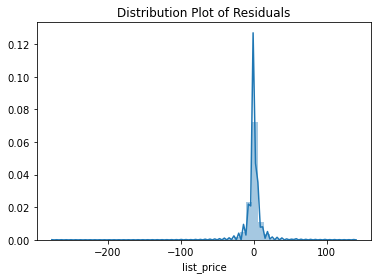

In [24]:
residual = y_test - y_predict

plt.title('Distribution Plot of Residuals')
sns.distplot(residual)
plt.show()